# Heirarchical Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
# Import Iris Dataset
iris=load_iris()

In [4]:
iris_data=pd.DataFrame(iris.data)

In [5]:
iris_data.columns=iris.feature_names

In [6]:
iris_data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [7]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
X_scaled=scaler.fit_transform(iris_data)

In [10]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
X_scaled.shape

(150, 4)

In [11]:
# Apply the PCA
from sklearn.decomposition import PCA

In [12]:
pca=PCA(n_components=2)

In [14]:
pca_scaled=pca.fit_transform(X_scaled)

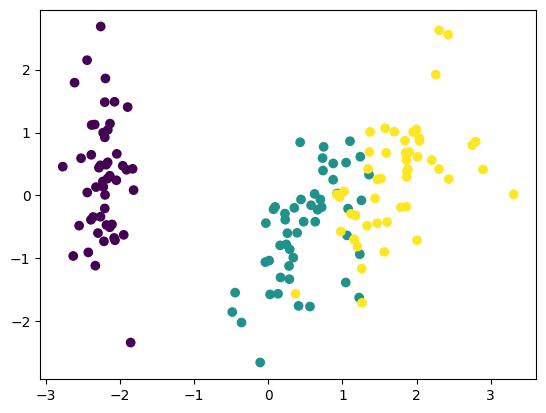

In [15]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

### Agglomerative Clustering
- Construct a Dendogram

In [16]:
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Euclidean Distance')

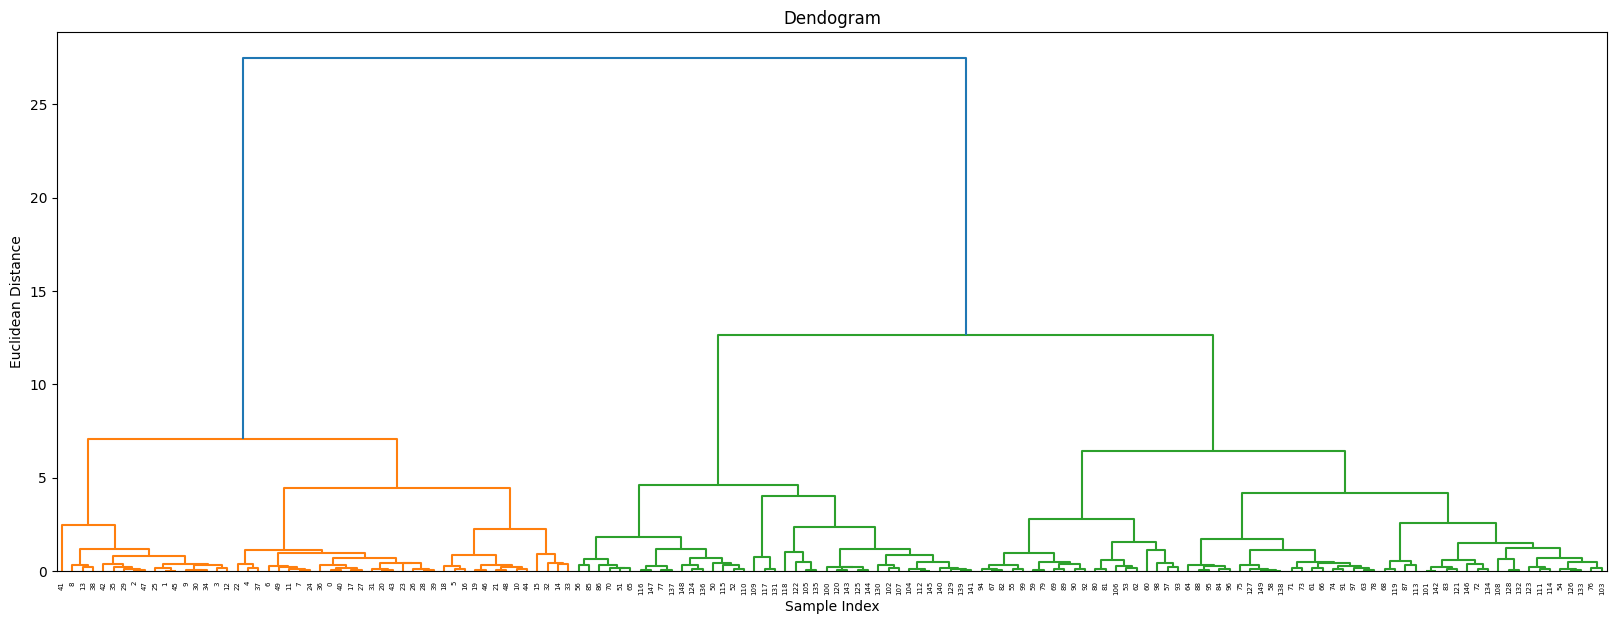

In [17]:
plt.figure(figsize=(20,7))
plt.title('Dendograms')

#Create Dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [21]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

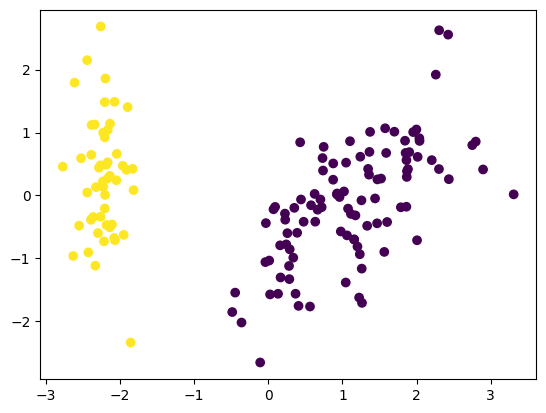

In [22]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [23]:
## Silhoutte Score
from sklearn.metrics import silhouette_score

In [24]:
Silhouette_Coefficient=[]

for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    Silhouette_Coefficient.append(score)

In [25]:
Silhouette_Coefficient

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

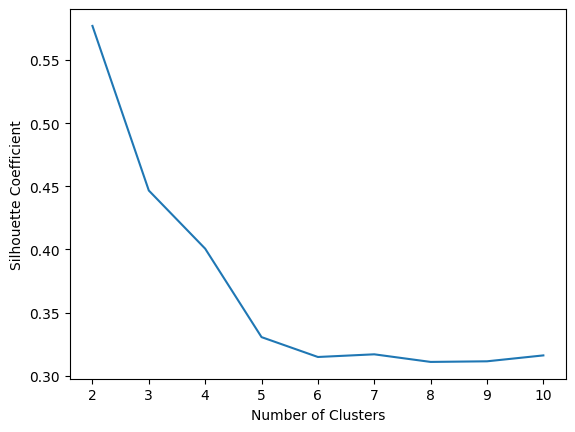

In [26]:
plt.plot(range(2,11),Silhouette_Coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()